# Deep Residual Networks (ResNets)

In [1]:
# pytorch
import torch
import torch.nn as nn # neural network yapısı
import torch.utils.data # data'yı pytorch'a uygun hale getirebilmek için kullanacağız
import torch.optim as optim

from PIL import Image # resimleri preprocess yaparken kullanırız

# görselleştirme
import matplotlib.pyplot as plt

import numpy as np
import os # resimleri import etmek için

GPU, grafik kartıdır. grafik kartı, neural network yapılarında CPU'dan çok daha hızlı çalışıyor bu yüzden kodları GPU yani grafik kartta çalıştırabiliriz böylece daha hızlı olur. default olarak kodlar CPU'da çalışır. GPU'da çalıştırmak için:

In [2]:
# cuda indirilip kurulmalı
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


### Veri setini okumak için kullandığımız metot:

İlgili klasörden istediğimiz resimleri okuyarak, bu resimleri istediğimiz bir konumda depoluyoruz.

In [3]:
# resimleri yüklemek için
# ilgili klasördeki tüm resimleri alıp array isimli parametreye yükler

def read_images(path, num_img): # path: klasörün yolu, num_img: kaç tane resim okunacak
    # array: num_img satır, 64*32 sütundan oluşur ve bütün elemanları 0'dır.
    array = np.zeros([num_img, 64*32]) # resimlerin boyutu 64 satır, 32 sütun
    # her bir satır bir tane resim olacak
    
    i = 0
    # path'in içerisindeki bütün resimleri yükler
    # path klasörün yolu
    # img ise o klasörün altındaki dosyalar
    for img in os.listdir(path): 
        img_path = path + "//" + img
        img = Image.open(img_path, mode="r") # read
        data = np.asarray(img, dtype = "uint8") # unit8'e çevirelim
        # resimi array'de depolamak için düzleştirelim
        data = data.flatten() # 5*5 -> 1*25
        array[i,:] = data # i. satırın bütün sütunlarına düzleştirilen data'yı yazdır.
        i += 1
        
    return array

### Veri setlerini okuyup, birleştirdiğimiz bölüm:

#### train - negatif

In [4]:
train_neg_path = r"LSIFIR/Classification/Train/neg"
num_train_neg_img = 43390
train_negative_array = read_images(train_neg_path, num_train_neg_img)

In [5]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# ilk 42000 resmi yani input'ları yükledik (x)
x_train_negative_tensor = torch.from_numpy(train_negative_array[:42000,:])
print("x_train_negative_tensor:", x_train_negative_tensor.size())

x_train_negative_tensor: torch.Size([42000, 2048])


x_train_negative_tensor içerisinde 43390 tane resim vardır.

In [6]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olmadığı için label 0 olsun
y_train_negative_tensor = torch.zeros(42000, dtype=torch.long)
print("y_train_negative_tensor:", y_train_negative_tensor.size())

y_train_negative_tensor: torch.Size([42000])


#### train - pozitif

In [7]:
train_pos_path = r"LSIFIR/Classification/Train/pos"
num_train_pos_img = 10208
train_positive_array = read_images(train_pos_path, num_train_pos_img)

In [8]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# resimleri yani input'ları yükledik (x)
x_train_positive_tensor = torch.from_numpy(train_positive_array[:10000,:])
print("x_train_positive_tensor:", x_train_positive_tensor.size())

x_train_positive_tensor: torch.Size([10000, 2048])


In [9]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olduğu için label 1 olsun
y_train_positive_tensor = torch.ones(10000, dtype=torch.long)
print("y_train_positive_tensor:", y_train_positive_tensor.size())

y_train_positive_tensor: torch.Size([10000])


y_train_positive_tensor içerisinde 10208 tane resim vardır.

#### train-pos ve train-neg veri setlerini birleştirip train veri setini oluşturalım

In [10]:
# concat
# birleştirirken yukarıdan aşağıya doğru birleştireceğim (alt alta): 0 (satırlar birleştirilir)
x_train = torch.cat((x_train_negative_tensor, x_train_positive_tensor), 0) # input
y_train = torch.cat((y_train_negative_tensor, y_train_positive_tensor), 0) # label

print("x_train:", x_train.size())
print("y_train:", y_train.size())

x_train: torch.Size([52000, 2048])
y_train: torch.Size([52000])


#### test - neg

In [11]:
test_neg_path = r"LSIFIR/Classification/Test/neg"
num_test_neg_img = 22050
test_negative_array = read_images(test_neg_path, num_test_neg_img)

In [12]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# resimleri yani input'ları yükledik (x)
x_test_negative_tensor = torch.from_numpy(test_negative_array[:18056,:])
print("x_test_negative_tensor:", x_test_negative_tensor.size())

x_test_negative_tensor: torch.Size([18056, 2048])


In [13]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olmadığı için label 0 olsun
y_test_negative_tensor = torch.zeros(18056, dtype=torch.long)
print("y_test_negative_tensor:", y_test_negative_tensor.size())

y_test_negative_tensor: torch.Size([18056])


#### test - pos

In [14]:
test_pos_path = r"LSIFIR/Classification/Test/pos"
num_test_pos_img = 5944
test_positive_array = read_images(test_pos_path, num_test_pos_img)

In [15]:
x_test_positive_tensor = torch.from_numpy(test_positive_array)
print("x_test_positive_tensor:", x_test_positive_tensor.size())

x_test_positive_tensor: torch.Size([5944, 2048])


In [16]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olduğu için label 1 olsun
y_test_positive_tensor = torch.ones(num_test_pos_img, dtype=torch.long)
print("y_test_positive_tensor:", y_test_positive_tensor.size())

y_test_positive_tensor: torch.Size([5944])


#### test-pos ve test-neg veri setlerini birleştirip train veri setini oluşturalım

In [17]:
# concat
# birleştirirken yukarıdan aşağıya doğru birleştireceğim (alt alta): 0 (satırlar birleştirilir)
x_test = torch.cat((x_test_negative_tensor, x_test_positive_tensor), 0) # input
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor), 0) # label

print("x_test:", x_test.size())
print("y_test:", y_test.size())

x_test: torch.Size([24000, 2048])
y_test: torch.Size([24000])


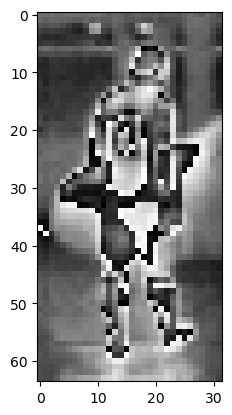

In [18]:
# herhangi bir resmi görselleştirelim
plt.imshow(x_train[43600,:].reshape(64,32), cmap="gray")
plt.show()

Resimleri yükledik, veri setimizi oluşturduk. Şimdi ise bu array'leri pytorch'a uygun hale getirelim.

In [19]:
num_classes = 2 # insan içeren ve içermeyen resimler

In [20]:
### Hiperparametreler
num_epochs = 100
batch_size = 2000
learning_rate = 0.0001

In [21]:
# x_train ve y_train'i birleştirelim ve train tensor elde edilir
train = torch.utils.data.TensorDataset(x_train, y_train)
# DataLoader metoduyla batch_size belirlenir ve shuffle = True (verileri karıştır)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)

In [22]:
test = torch.utils.data.TensorDataset(x_test, y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [23]:
# train ve test için kullanılacak olan veri setlerini trainloader ve testloader oluşturuldu.

### IR Pedestrian Projesi: Python(Pytorch) ile Deep Residual Basic Block

**Padding:**

Normalde bir filtre resmin üzerinde dolaştırıldığında, çıktı (output) resmi orijinal resimden daha küçük olur. Bu küçülmenin önlenmesi için padding (doldurma) işlemi yapılır.

Örnek olarak, 4x4 boyutundaki bir resmin üzerinde 2x2 boyutundaki bir filtre (stride = 1) kullanırsak, sonuç olarak 3x3 boyutunda bir çıktı elde ederiz.

Ancak, çıktının orijinal resimle aynı boyutta olmasını istiyorsak, giriş (input) resminin (örneğin 4x4) etrafına padding ekleriz ve boyutunu artırırız.

Boyutun azaltılmaması, low level layer'lardaki (ilk layer'lar) bilgi kaybını engeller.

In [24]:
# 1. convolutional layer
# filtre: 3x3 (kernel_size)
def conv3x3(in_planes, out_planes, stride = 1): # input channel, output channel
    # in_planes, input resimindeki kanal sayısıdır: RGB 3, gray scale ise 1
    # out_planes ise layer'daki nöron sayısı
    # stride, bir resim üzerinde filtreyle (kernel ile) tarama yaparken, 1 ise 1'er 1'er atlayarak tarama yapılır
    return nn.Conv2d(in_planes, out_planes, kernel_size = 3, stride = stride, padding = 1, bias = False)


In [25]:
# Batch normalizasyon yapılacağından bias'a gerek yoktur.

In [26]:
# 2. convolutional layer
# filtre: 1x1 (kernel_size)
def conv1x1(in_planes, out_planes, stride = 1): # input channel, output channel
    # in_planes, input resimindeki kanal sayısıdır: RGB 3, gray scale ise 1
    # out_planes ise layer'daki nöron sayısı
    # stride, bir resim üzerinde filtreyle (kernel ile) tarama yaparken, 1 ise 1'er 1'er atlayarak tarama yapılır
    return nn.Conv2d(in_planes, out_planes, kernel_size = 1, stride = stride, bias = False)

### Basic Block

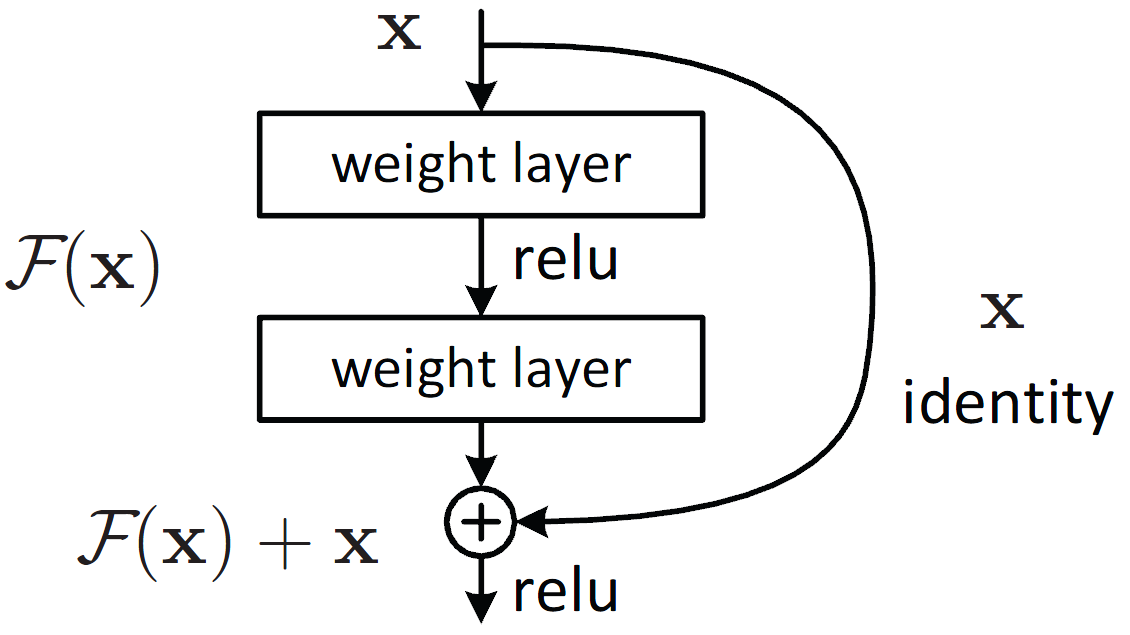

In [27]:
# basic block
class BasicBlock(nn.Module): # pytorch'un neural network Module sınıfını inherit etti (miras aldı)
    # nn.Module sınıfdaki bazı fonksiyonları kullanmak için
    
    expansion = 1
    
    # input channel, output channel
    def __init__(self,inplanes, planes, stride = 1, downsample = None):
        super(BasicBlock,self).__init__()
        # BasicBlock neural network Module sınıfını başlatıyor
        # o sınıfdaki metotları kullanabilirim
        
        # basic block oluşturulur:
        # conv, bn, relu, stride, downsample
        
        # batch normalizasyon her layer'da normalizasyon yapmak demekti
        
        self.conv1 = conv3x3(inplanes, planes, stride) # input channel, output channel, stride
        self.bn1 = nn.BatchNorm2d(planes) # conv1'in output'u bn1'in input'u oldu.
        
        # ReLU aktivasyon fonksiyonunu çağırdıktan sonra sonucunu kendisine eşitle
        self.relu = nn.ReLU(inplace = True) # aktivasyon fonksiyonu
        
        # dropout ile rastgele node'lar kapatılır, overfitting önlenir.
        self.drop = nn.Dropout(0.9)
        
        self.conv2 = conv3x3(planes, planes) # input channel, output channel
        self.bn2 = nn.BatchNorm2d(planes) # output channel
        
        self.downsample = downsample
        self.stride = stride
        # basic bloklarımızı tanımladık
        
    # forward ile basic blokları birbirine bağlayalım
    def forward(self, x): # içerisinde bulunduğu sınıfın objesi, input
        identity = x # shortcut yani x aşağıdaki layer'ların paralelinde gelir
        # ve relu'dan önce toplanır
        
        # 1. kısım
        out = self.conv1(x) # convolutional layer
        out = self.bn1(out) # BatchNorm2d
        out = self.relu(out) # aktivasyon fonksiyonu
        out = self.drop(out) # Dropout
        # 2. kısım
        out = self.conv2(out) # convolutional layer
        out = self.bn2(out) # BatchNorm2d
        out = self.drop(out) # Dropout
        
        # identity ve out'u toplamamız için aynı boyutta olmalılar
        # bu yüzden downsample yapalım
        if self.downsample is not None: # eğer downsample varsa
            identity = self.downsample(x) # out ile boyutlar eşitlenir.
        
        out += identity # shortcut yani x
        
        out = self.relu(out) # aktivasyon fonksiyonu
        
        return out

In [28]:
# stride 1 olduğunda sorun yoktur fakat stride 2 ise boyut azalır bu yüzden x (identity)
# ve out toplanamaz çünkü out'un boyutu daha küçük olur
# bu yüzden eğer stride 2 ise identity'e downsample yapmak zorundayım

In [29]:
# downsample:
# conv ve batchnorm olacak (sağda)
# sol taraftakiyle aynı stride 
# böylece sol ve sağ (identity) taraftaki size'lar birbirine eşit olur

BatchNorm, normalizasyonun her bir layer’da yapılmış halidir. input, her layer’dan sonra aktivasyon fonksiyonuna giriyor, aktivasyon fonksiyonundan çıkan output normalize ediliyor. Her bir layer’da normalize işleminin yapılmasıdır.

### Deep Residual Network Layer ve Deep Residual Network Modeli

In [30]:
# _make_layer ile birden çok basic block birleştirerek deep residual network oluşturacağız

In [31]:
# deep residual network class
class ResNet(nn.Module): # nn.Module'den inherit eder
    
    # num_classes = 2'ydi (insan var, insan yok)
    def __init__(self, block, layers, num_classes = num_classes):
        super(ResNet,self).__init__() # nn fonksiyonlarını kullanabiliriz
        
        self.inplanes = 64 # input channel (hiperparametre)
        # input channel, output channel
        # stride = 2 olduğundan downsample yapılır
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride = 2, padding = 3, bias= False)
        # conv1 output channel = 64 old. BatchNorm2d input 64
        self.bn1 = nn.BatchNorm2d(64)
        
        self.relu = nn.ReLU(inplace = True)
        # pooling
        self.maxpool = nn.MaxPool2d(kernel_size= 3, stride = 2, padding = 1)
        
        ####### _make_layer ########
        
        # ml1
        # block, input channel, layers = her layer için oluşturulacak blok sayısı
        self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
        
        # ml2
        self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
        
        # ml3
        self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)
        
        #### Pooling
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))    
        
        # adaptive pooling'in avg pooling'den farkı 
        # avg pooling'de filtrenin boyutu belirlenir 
        # adaptive pooling'de output verilir (1,1) ve filtrenin boyutunu kendisi belirler
        # yani output'un boyutuna göre filtre boyutunu kendisi ayarlar
        
        #### fully connected
        # block genişlemesi: expansion = 1
        # num_classes = 2'ydi (insan var, insan yok)
        self.fc = nn.Linear(256*block.expansion, num_classes)
        
        # birçok layer olduğundan birçok weight vardır
        # bu weightlere ilk değerlerini atamalıyız
        # eğer mantıksız olursa model iyi öğrenemez
        for m in self.modules(): # modules, nn sınıfından gelir. m'e sırasıyla layerları atar
            # m: conv1, bn1...
            
            if isinstance(m,nn.Conv2d): # m, Conv2d mi?
                # m'in weight'lerini güncelle
                # kaiming_normal_, 0'a çok yakın değerler atar
                nn.init.kaiming_normal_(m.weight, mode = "fan_out", nonlinearity = "relu")
                
            elif isinstance(m, nn.BatchNorm2d): # m, BatchNorm2d ise
                nn.init.constant_(m.weight,1) # tüm weight'leri 1'e eşitle
                nn.init.constant_(m.bias,0) # tüm bias'ları 0'a eşitle
        
    
    # basic block'ları art arda koyarak yeni bir yapı oluşturacak
    # _make_layer, aldığı input'lara göre basic block'ları birbirine bağlar
    # _make_layer metodu deep residual network'ün basic block kısmını oluşturan yapı olacak
    def _make_layer(self, block, planes, blocks, stride = 1): # planes = input channel 
        # blocks: basic block'lardan kaç tane inşaa edilecek (2 ise iki tane block art arda bağlanır)
        
        downsample = None
        # _make_layer basic block yaparken downsample'ın olup olmaması yani 
        # stride = 1 olup olmaması önemliydi
        # downsample'ı aktif edeceğiz mi etmeyeceğiz mi karar vermeliyiz
        # çünkü basic blocklar birbirine bağlanacak ve stride biliniyor
        # bu yüzden downsample'ın yapılıp yapılmayacağına karar verilebilir
       
        # inplanes: input channel
        # stride 1'den farklıysa boyut değişir bu yüzden downsample yapılmalı
        if stride != 1 or self.inplanes != planes*block.expansion:
            # her zaman expansion=1 olarak kullanacağız
            # expansion=1 olması genişletilmiş bir tane blok olacak demektir.
            # expansion=1 olması inplanes'e eşitlik sağlar: self.inplanes = planes*block.expansion
            # inplanes (input channel)'a eşit değilse downsample yapılır çünkü boyut değişir
            downsample = nn.Sequential(
                # input channel, output channel
                conv1x1(self.inplanes, planes*block.expansion, stride),
                # conv1x1'in çıktısı BatchNorm2d'un input'u
                nn.BatchNorm2d(planes*block.expansion))
            
            
            
        layers = []
        # input channel, output channel
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes*block.expansion # blokları genişletmek istersek expansion artırılır
            
        # blok sayısına (blocks) göre blok ekleyeceğiz
        # default olarak 1 tane block eklediğimizden blocks - 1 kadar blok ekleyeceğiz
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))
                
        # layer'ların hepsini alacak art arda dizecek ve 
        # sequantial bir neural network haline getirecek
        # 1 tane layer oluşturacak
        return nn.Sequential(*layers)
    
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x) # 2 tane basic block bulunur
        x = self.layer2(x)
        x = self.layer3(x)    
        
        x = self.avgpool(x)
        
        # x'in boyutunu view ile değiştiriyoruz
        # flattening: düzleştirme yapılır
        x = x.view(x.size(0), -1) # -1: x'e göre doldurur
        
        x = self.fc(x)
        
        return x # sınıflar (0 ya da 1)

In [32]:
# 2 tane basic block oluşturulacak
# ve _make_layer, bu iki tane bloğu birbirine bağlayacak
# blok1 ve blok2'nin özelliği downsample yapabilir yapmayabilir

In [33]:
# _make_layer ile basic block'ları bir araya getirerek layer yapmayı öğrenmiştik
# resnet'in diğer layer'ları ile basic block'lar'dan oluşan _make_layer'ı birleştireceğiz
# blocks = 2 ise _make_layer 2 bloktan oluşacak
# layer'lar init fonksiyonunda inşaa edilecek, forward fonksiyonunda ise birleştirilecek

#### İlk Deep Residual Network Modelini Yaratalım:

In [34]:
# layers = [2, 2, 2]
# 3 layer olacak ve her layer'da 2 tane BasicBlock olacak
model = ResNet(BasicBlock, [2, 2, 2])

In [35]:
# GPU'da çalıştırmak için
# model device'a gönderilir, device GPU olmalı
# model = ResNet(BasicBlock, [2, 2, 2]).to(device)

### ResNet Loss Fonksiyonu ve Optimizer

In [36]:
# Loss
criterion = nn.CrossEntropyLoss()

In [37]:
# optimizer
# Adaptive momentum
# model'in parametrelerini güncelle
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### ResNet Eğitimi

In [38]:
loss_list = [] # loss değerleri
# accuracy değerleri
train_acc = []
test_acc = []
use_gpu = False # GPU kullanmak için

total_step = len(trainloader)

for epoch in range(num_epochs): # 100
    for i, (images, labels) in enumerate(trainloader):
        
        # reshape: yeniden boyutlandıralım
        # batch_size: kaç tane resim aynı anda eğitilsin, kanal sayısı, resimin boyutu 64*32
        images = images.view(batch_size, 1, 64, 32)
        images = images.float()
        
        # GPU
        if use_gpu:
            if torch.cuda.is_available(): # cuda kuruluysa
                # resimleri ve label'ları işlem görebilmesi için device'a yani gpu'ya yollamalıyız
                images, labels = images.to(device), labels.to(device)
                
        
        # resimleri modele input olarak vereceğiz ve model tahmin yapacak
        # tahmini değerler output olarak geri dönderilecek
        outputs = model(images)
        
        # gerçek değerler (labels) ve tahmini değerler (outputs) ile loss hesaplanır
        loss = criterion(outputs, labels)
        
        
        # backward ve optimization
        
        # optimizer'da gradient'lere sıfır atayalım
        optimizer.zero_grad() # pytorch'ta gradient'ler her adımda sıfırlanması gerekir
        
        # back propagation yapalım
        # loss fonksiyonuna göre parametreleri (weight'leri) güncellememiz gerekir
        # back propagation ile gradient'leri bulmalıyız
        loss.backward() # back propagation yap
        optimizer.step() # ile güncellenir
        
        
        
        if i % 2 == 0:
            print("epoch: {} {}/{}".format(epoch, i, total_step))
            
            
    # bir epoch tamamlandıktan sonra her epoch'un sonunda train ve test veri setine göre
    # accuracy değerlerine bakalım
    
    # train veri setine göre accuracy değerlerine bakalım
    correct = 0
    total = 0
    
    with torch.no_grad(): # parametreler güncellenmeyecek
        for data in trainloader:
            # model ne kadar doğrulukta tahmin yapabiliyor
            images, labels = data
            
            # reshape: yeniden boyutlandıralım
            # batch_size: kaç tane resim aynı anda eğitilsin, kanal sayısı, resimin boyutu 64*32
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available(): # cuda kuruluysa
                    # resimleri ve label'ları işlem görebilmesi için device'a yani gpu'ya yollamalıyız
                    images, labels = images.to(device), labels.to(device)
                    
            # output'lardan ne kadarı doğru
            # model tahmin eder, tahminler outputs'a atanır
            outputs = model(images)
            # kaç tane doğru tahmin yapıldı
            
            # olasılık değerlerinden en büyük olanın indeksini yani sınıfını geri dönderir
            _, predicted = torch.max(outputs.data, 1)
            
            # toplam veri
            total += labels.size(0)
            
            # toplam doğru tahmin edilen veri
            correct += (predicted == labels).sum().item() # int'e çevirmek için item fonk. kul.
            
    print("Accuracy train %d %%" %(100*correct/total))
    train_acc.append(100*correct/total)
    
    
    
    # test veri setine göre accuracy değerlerine bakalım
    correct = 0
    total = 0
    
    with torch.no_grad(): # parametreler güncellenmeyecek
        for data in testloader:
            # model ne kadar doğrulukta tahmin yapabiliyor
            images, labels = data
            
            # reshape: yeniden boyutlandıralım
            # batch_size: kaç tane resim aynı anda eğitilsin, kanal sayısı, resimin boyutu 64*32
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available(): # cuda kuruluysa
                    # resimleri ve label'ları işlem görebilmesi için device'a yani gpu'ya yollamalıyız
                    images, labels = images.to(device), labels.to(device)
                    
            # output'lardan ne kadarı doğru
            # model tahmin eder, tahminler outputs'a atanır
            outputs = model(images)
            # kaç tane doğru tahmin yapıldı
            
            # olasılık değerlerinden en büyük olanın indeksini yani sınıfını geri dönderir
            _, predicted = torch.max(outputs.data, 1)
            
            # toplam veri
            total += labels.size(0)
            
            # toplam doğru tahmin edilen veri
            correct += (predicted == labels).sum().item() # int'e çevirmek için item fonk. kul.
            
    print("Accuracy test %d %%" %(100*correct/total))
    test_acc.append(100*correct/total)
    
    
    # loss değerini depolayalım
    loss_list.append(loss.item()) # item ile loss değerini int'e çevirdim

epoch: 0 0/26
epoch: 0 2/26
epoch: 0 4/26
epoch: 0 6/26
epoch: 0 8/26
epoch: 0 10/26
epoch: 0 12/26
epoch: 0 14/26
epoch: 0 16/26
epoch: 0 18/26
epoch: 0 20/26
epoch: 0 22/26
epoch: 0 24/26
Accuracy train 79 %
Accuracy test 74 %
epoch: 1 0/26
epoch: 1 2/26
epoch: 1 4/26
epoch: 1 6/26
epoch: 1 8/26
epoch: 1 10/26
epoch: 1 12/26
epoch: 1 14/26
epoch: 1 16/26
epoch: 1 18/26
epoch: 1 20/26
epoch: 1 22/26
epoch: 1 24/26
Accuracy train 80 %
Accuracy test 74 %
epoch: 2 0/26
epoch: 2 2/26
epoch: 2 4/26
epoch: 2 6/26
epoch: 2 8/26
epoch: 2 10/26
epoch: 2 12/26
epoch: 2 14/26
epoch: 2 16/26
epoch: 2 18/26
epoch: 2 20/26
epoch: 2 22/26
epoch: 2 24/26
Accuracy train 80 %
Accuracy test 71 %
epoch: 3 0/26
epoch: 3 2/26
epoch: 3 4/26
epoch: 3 6/26
epoch: 3 8/26
epoch: 3 10/26
epoch: 3 12/26
epoch: 3 14/26
epoch: 3 16/26
epoch: 3 18/26
epoch: 3 20/26
epoch: 3 22/26
epoch: 3 24/26
Accuracy train 81 %
Accuracy test 69 %
epoch: 4 0/26
epoch: 4 2/26
epoch: 4 4/26
epoch: 4 6/26
epoch: 4 8/26
epoch: 4 10/26

KeyboardInterrupt: 

In [ ]:
# görselleştirme

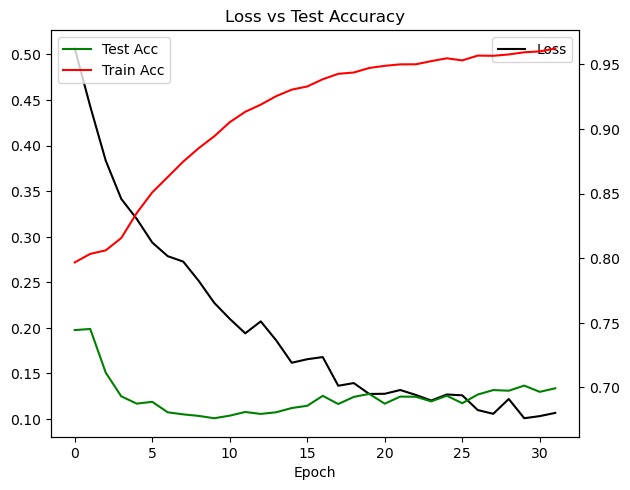

In [39]:
fig, ax1 = plt.subplots()
plt.plot(loss_list, label = "Loss", color = "black")
ax2 = ax1.twinx()
ax2.plot(np.array(test_acc)/100, label = "Test Acc", color="green")
ax2.plot(np.array(train_acc)/100, label = "Train Acc", color="red")
ax1.legend()
ax2.legend()
ax1.set_xlabel("Epoch")
fig.tight_layout()
plt.title("Loss vs Test Accuracy")
plt.show()

* Train Accuracy: %81
* Test Accuracy: %69
* training yani epoch sayısı arttıkça Accuracy değerlerinin arttığı gözlemlenmiştir.